Citations: [made with the help of kaggle.com]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sklearn.ensemble import RandomForestRegressor

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers

# load the data
df_test = pd.read_csv(r"C:\Users\Shrey\Downloads\test.csv")
df_train = pd.read_csv(r"C:\Users\Shrey\Downloads\train.csv")
df = df_train.append(df_test , ignore_index = True)


df_train.shape, df_test.shape, df_train.columns.values

Using TensorFlow backend.
C:\Users\shrey\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


((891, 12),
 (418, 11),
 array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))

In [2]:
# check if there is any NAN
df['Pclass'].isnull().sum(axis=0)

0

In [3]:
# inspect the correlation between Pclass and Survived
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [4]:
df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [5]:
df['Title'] = df.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

# inspect the amount of people for each title
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Dona              1
Don               1
Lady              1
Sir               1
the Countess      1
Jonkheer          1
Capt              1
Mme               1
Name: Title, dtype: int64

In [6]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss') 
             & (df.Title !=  'Mrs')] = 'Others'

# inspect the correlation between Title and Survived
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

C:\Users\shrey\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


In [7]:
# inspect the amount of people for each title
df['Title'].value_counts()

Mr        757
Miss      262
Mrs       201
Master     61
Others     28
Name: Title, dtype: int64

In [8]:
df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1).drop(labels=['Name'], axis=1)

In [9]:
# check if there is any NAN
df.Sex.isnull().sum(axis=0)

0

In [10]:
# inspect the correlation between Sex and Survived
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
# map the two genders to 0 and 1
df.Sex = df.Sex.map({'male':0, 'female':1})

In [12]:
# check if there is any NAN
df.Age.isnull().sum(axis=0)

263

In [13]:
# check if there is any NAN
df.SibSp.isnull().sum(axis=0), df.Parch.isnull().sum(axis=0)

(0, 0)

In [14]:
# create a new feature "Family"
df['Family'] = df['SibSp'] + df['Parch'] + 1

# inspect the correlation between Family and Survived
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [15]:
# inspect the amount of people for each Family size
df['Family'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [16]:
df.Family = df.Family.map(lambda x: 0 if x > 4 else x)
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,0,0.161290
1,1,0.303538
2,2,0.552795
3,3,0.578431
4,4,0.724138


In [17]:
df['Family'].value_counts()

1    790
2    235
3    159
0     82
4     43
Name: Family, dtype: int64

In [18]:
# check if there is any NAN
df.Ticket.isnull().sum(axis=0)

0

In [19]:
df.Ticket.head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [20]:
df.Ticket = df.Ticket.map(lambda x: x[0])

# inspect the correlation between Ticket and Survived
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [21]:
# inspect the amount of people for each type of tickets
df['Ticket'].value_counts()

3    429
2    278
1    210
S     98
P     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: Ticket, dtype: int64

In [22]:
df[['Ticket', 'Fare']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Fare
0,1,65.771211
1,2,20.235194
2,3,15.380682
3,4,16.764036
4,5,19.262500
5,6,19.153711
6,7,9.197438
7,8,8.397900
8,9,7.750000
9,A,10.189681


In [23]:
df[['Ticket', 'Pclass']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Pclass
0,1,1.147619
1,2,2.309353
2,3,2.904429
3,4,3.000000
4,5,2.333333
5,6,2.111111
6,7,3.000000
7,8,3.000000
8,9,3.000000
9,A,3.000000


In [24]:
# check if there is any NAN
df.Fare.isnull().sum(axis=0)

1

In [25]:
df.Ticket[df.Fare.isnull()]

1043    3
Name: Ticket, dtype: object

In [26]:
df.Pclass[df.Fare.isnull()]

1043    3
Name: Pclass, dtype: int64

In [27]:
df.Cabin[df.Fare.isnull()]

1043    NaN
Name: Cabin, dtype: object

In [28]:
df.Embarked[df.Fare.isnull()]

1043    S
Name: Embarked, dtype: object

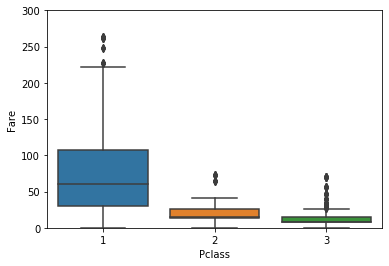

In [29]:
# use boxplot to visualize the distribution of Fare for each Pclass
sns.boxplot('Pclass','Fare',data=df)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show()

In [30]:
# inspect the correlation between Pclass and Fare
df[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [31]:
# divide the standard deviation by the mean. A lower ratio means a tighter 
# distribution of Fare in each Pclass
df[['Pclass', 'Fare']].groupby(['Pclass']).std() / df[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,0.919302
2,0.642476
3,0.864050


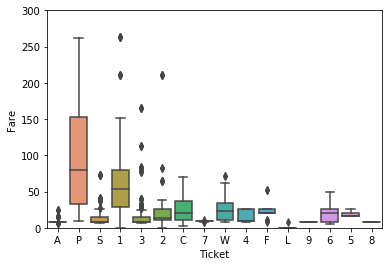

In [32]:
# use boxplot to visualize the distribution of Fare for each Ticket
sns.boxplot('Ticket','Fare',data=df)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show()

In [33]:
# inspect the correlation between Ticket and Fare 
# (we saw this earlier)
df[['Ticket', 'Fare']].groupby(['Ticket']).mean()

,Fare
Ticket,
1,65.771211
2,20.235194
3,15.380682
4,16.764036
5,19.262500
6,19.153711
7,9.197438
8,8.397900
9,7.750000


In [34]:
# divide the standard deviation by the mean. A lower ratio means a tighter 
# distribution of Fare in each Ticket type
df[['Ticket', 'Fare']].groupby(['Ticket']).std() /  df[['Ticket', 'Fare']].groupby(['Ticket']).mean()

,Fare
Ticket,
1,0.817411
2,1.284139
3,1.351244
4,0.497578
5,0.284367
6,0.735873
7,0.080078
8,0.005961
9,0.000000


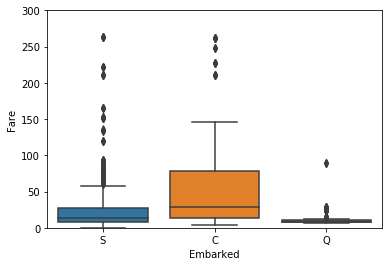

In [35]:
# use boxplot to visualize the distribution of Fare for each Embarked
sns.boxplot('Embarked','Fare',data=df)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show()

In [36]:
# inspect the correlation between Embarked and Fare
df[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
C,62.336267
Q,12.409012
S,27.418824


In [37]:
# divide the standard deviation by the mean. A lower ratio means a tighter 
# distribution of Fare in each Embarked
df[['Embarked', 'Fare']].groupby(['Embarked']).std() /  df[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
C,1.350514
Q,1.097278
S,1.352954


In [38]:
guess_Fare = df.Fare.loc[ (df.Ticket == '3') & (df.Pclass == 3) & (df.Embarked == 'S')].median()
df.Fare.fillna(guess_Fare , inplace=True)

# inspect the mean Fare values for people who died and survived
df[['Fare', 'Survived']].groupby(['Survived'],as_index=False).mean()

,Survived,Fare
0,0.0,22.117887
1,1.0,48.395408


C:\Users\shrey\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


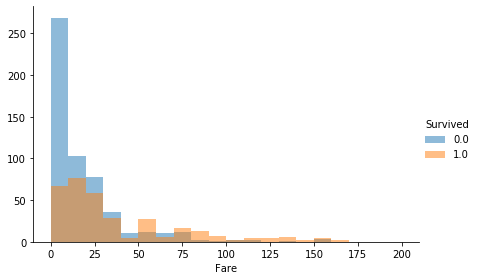

In [39]:
# visualize the distribution of Fare for people who survived and died
grid = sns.FacetGrid(df, hue='Survived', size=4, aspect=1.5)
grid.map(plt.hist, 'Fare', alpha=.5, bins=range(0,210,10))
grid.add_legend()
plt.show()

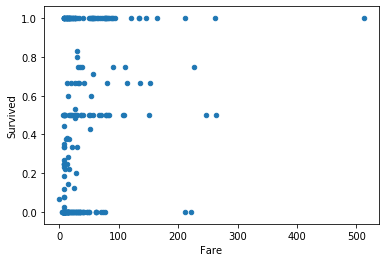

In [40]:
# visualize the correlation between Fare and Survived using a scatter plot
df[['Fare', 'Survived']].groupby(['Fare'],as_index=False).mean().plot.scatter('Fare','Survived')
plt.show()

In [41]:
# bin Fare into five intervals with equal amount of people
df['Fare-bin'] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5]).astype(int)

# inspect the correlation between Fare-bin and Survived
df[['Fare-bin', 'Survived']].groupby(['Fare-bin'], as_index=False).mean()

,Fare-bin,Survived
0,1,0.217877
1,2,0.201087
2,3,0.426901
3,4,0.443243
4,5,0.645349


In [42]:
# check if there is any NAN
df.Cabin.isnull().sum(axis=0)

1014

In [43]:
df = df.drop(labels=['Cabin'], axis=1)

In [44]:
# check if there is any NAN
df.Embarked.isnull().sum(axis=0)

2

In [45]:
df.describe(include=['O']) # S is the most common

,Embarked,Ticket,Title
count,1307,1309,1309
unique,3,16,5
top,S,3,Mr
freq,914,429,757


In [46]:
# fill the NAN
df.Embarked.fillna('S' , inplace=True )

In [47]:
# inspect the correlation between Embarked and Survived as well as some other features
df[['Embarked', 'Survived','Pclass','Fare', 'Age', 'Sex']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived,Pclass,Fare,Age,Sex
0,C,0.553571,1.851852,62.336267,32.332170,0.418519
1,Q,0.389610,2.894309,12.409012,28.630000,0.487805
2,S,0.339009,2.344978,27.512485,29.298151,0.319869


In [48]:
df = df.drop(labels='Embarked', axis=1)

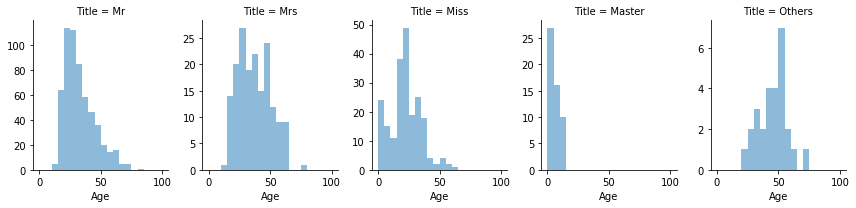

In [49]:
# visualize the correlation between Title and Age
grid = sns.FacetGrid(df, col='Title', size=3, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [50]:
# inspect the mean Age for each Title
df[['Title', 'Age']].groupby(['Title']).mean()

,Age
Title,
Master,5.482642
Miss,21.795236
Mr,32.252151
Mrs,36.930636
Others,45.074074


In [51]:
# inspect the standard deviation of Age for each Title
df[['Title', 'Age']].groupby(['Title']).std()

,Age
Title,
Master,4.161554
Miss,12.192794
Mr,12.422089
Mrs,12.872625
Others,11.303253


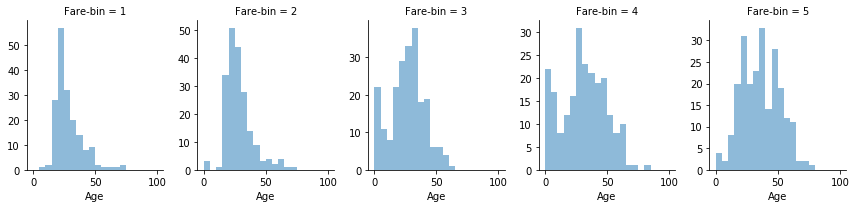

In [52]:
# visualize the correlation between Fare-bin and Age
grid = sns.FacetGrid(df, col='Fare-bin', size=3, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [53]:
# inspect the mean Age for each Fare-bin
df[['Fare-bin', 'Age']].groupby(['Fare-bin']).mean()

,Age
Fare-bin,
1,27.848315
2,27.898241
3,26.144009
4,30.728604
5,35.877913


In [54]:
# inspect the standard deviation of Age for each Fare-bin
df[['Fare-bin', 'Age']].groupby(['Fare-bin']).std()

,Age
Fare-bin,
1,10.812580
2,10.995650
3,13.523208
4,17.466022
5,15.150724


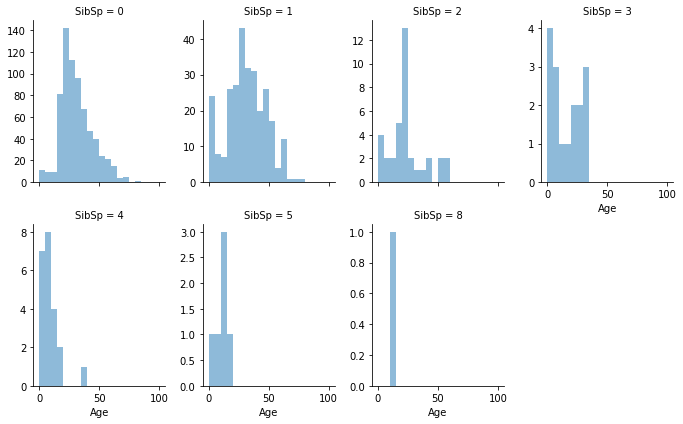

In [55]:
# visualize the correlation between SibSp and Age
grid = sns.FacetGrid(df, col='SibSp', col_wrap=4, size=3.0, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [56]:
# inspect the mean Age for each SibSp
df[['SibSp', 'Age']].groupby(['SibSp']).mean()

,Age
SibSp,
0,30.921766
1,31.058071
2,23.569444
3,16.312500
4,8.772727
5,10.166667
8,14.500000


In [57]:
# inspect the standard deviation of Age for each SibSp
df[['SibSp', 'Age']].groupby(['SibSp']).std()

,Age
SibSp,
0,13.059751
1,15.974482
2,14.910640
3,11.824938
4,8.005545
5,5.192944
8,NaN


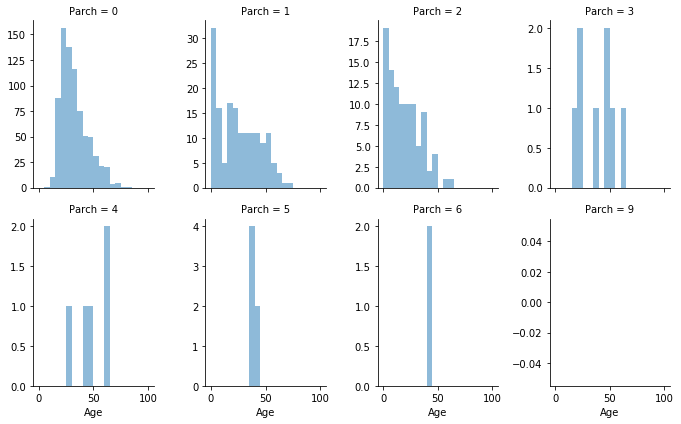

In [58]:
# visualize the correlation between Parch and Age
grid = sns.FacetGrid(df, col='Parch', col_wrap=4, size=3.0, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [59]:
# inspect the mean Age for each Parch
df[['Parch', 'Age']].groupby(['Parch']).mean()

,Age
Parch,
0,31.969401
1,24.965625
2,18.975979
3,38.875000
4,47.600000
5,39.333333
6,41.500000
9,NaN


In [60]:
# inspect the standard deviation of Age for each Parch
df[['Parch', 'Age']].groupby(['Parch']).std() 

,Age
Parch,
0,12.422617
1,18.410885
2,14.564066
3,16.295815
4,14.432602
5,1.032796
6,2.121320
9,NaN


In [61]:
df_sub = df[['Age','Master','Miss','Mr','Mrs','Others','Fare-bin','SibSp']]

X_train  = df_sub.dropna().drop('Age', axis=1)
y_train  = df['Age'].dropna()
X_test = df_sub.loc[np.isnan(df.Age)].drop('Age', axis=1)

regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test),1)
df.Age.loc[df.Age.isnull()] = y_pred

df.Age.isnull().sum(axis=0) # no more NAN now

C:\Users\shrey\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [62]:
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # This is somewhat arbitrary...
age_index = (1,2,3,4,5,6,7)
#('baby','child','teenager','young','mid-age','over-50','senior')
df['Age-bin'] = pd.cut(df.Age, bins, labels=age_index).astype(int)

df[['Age-bin', 'Survived']].groupby(['Age-bin'],as_index=False).mean()

,Age-bin,Survived
0,1,0.675000
1,2,0.452381
2,3,0.402597
3,4,0.315789
4,5,0.427083
5,6,0.375000
6,7,0.125000


In [63]:
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [64]:
df['Ticket'].value_counts()

3    429
2    278
1    210
S     98
P     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: Ticket, dtype: int64

In [65]:
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

# check the correlation again
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [66]:
# dummy encoding
df = pd.get_dummies(df,columns=['Ticket'])

In [67]:
df = df.drop(labels=['SibSp','Parch','Age','Fare','Title'], axis=1)
y_train = df[0:891]['Survived'].values
X_train = df[0:891].drop(['Survived','PassengerId'], axis=1).values
X_test  = df[891:].drop(['Survived','PassengerId'], axis=1).values

In [68]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(X_train, y_train, batch_size = 32, epochs = 200)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/200
891/891 [==============================] - 1s 718us/step - loss: 0.6919 - acc: 0.6162
Epoch 2/200
891/891 [==============================] - 0s 49us/step - loss: 0.6885 - acc: 0.6162
Epoch 3/200
891/891 [==============================] - 0s 45us/step - loss: 0.6824 - acc: 0.6162
Epoch 4/200
891/891 [==============================] - 0s 49us/step - loss: 0.6660 - acc: 0.6162
Epoch 5/200
891/891 [==============================] - 0s 45us/step - loss: 0.6342 - acc: 0.6162
Epoch 6/200
891/891 [==============================] - 0s 45us/step - loss: 0.5916 - acc: 0.6162
Epoch 7/200
891/891 [==============================] - 0s 49us/step - loss: 0.5587 - acc: 0.6162
Epoch 8/200
891/891 [==============================] - 0s 54us/step - loss: 0.5386 - acc: 0.6162
Epoch 9/200
891/891 [==============================] - 0s 45us/step - loss: 0.5273 - acc: 0.6162
Epoch 10/200
891/891 [====

891/891 [==============================] - 0s 36us/step - loss: 0.3969 - acc: 0.8373
Epoch 70/200
891/891 [==============================] - 0s 40us/step - loss: 0.3970 - acc: 0.8384
Epoch 71/200
891/891 [==============================] - 0s 45us/step - loss: 0.3966 - acc: 0.8350
Epoch 72/200
891/891 [==============================] - 0s 49us/step - loss: 0.3965 - acc: 0.8384
Epoch 73/200
891/891 [==============================] - 0s 31us/step - loss: 0.3970 - acc: 0.8350
Epoch 74/200
891/891 [==============================] - 0s 40us/step - loss: 0.3980 - acc: 0.8384
Epoch 75/200
891/891 [==============================] - 0s 40us/step - loss: 0.3970 - acc: 0.8373
Epoch 76/200
891/891 [==============================] - 0s 40us/step - loss: 0.3956 - acc: 0.8373
Epoch 77/200
891/891 [==============================] - 0s 36us/step - loss: 0.3976 - acc: 0.8361
Epoch 78/200
891/891 [==============================] - 0s 40us/step - loss: 0.3957 - acc: 0.8294
Epoch 79/200
891/891 [===========

891/891 [==============================] - 0s 36us/step - loss: 0.3874 - acc: 0.8373
Epoch 153/200
891/891 [==============================] - 0s 40us/step - loss: 0.3873 - acc: 0.8350
Epoch 154/200
891/891 [==============================] - 0s 40us/step - loss: 0.3876 - acc: 0.8384
Epoch 155/200
891/891 [==============================] - 0s 40us/step - loss: 0.3868 - acc: 0.8395
Epoch 156/200
891/891 [==============================] - 0s 54us/step - loss: 0.3877 - acc: 0.8384
Epoch 157/200
891/891 [==============================] - 0s 49us/step - loss: 0.3866 - acc: 0.8361
Epoch 158/200
891/891 [==============================] - 0s 49us/step - loss: 0.3874 - acc: 0.8361
Epoch 159/200
891/891 [==============================] - 0s 40us/step - loss: 0.3873 - acc: 0.8305
Epoch 160/200
891/891 [==============================] - 0s 45us/step - loss: 0.3860 - acc: 0.8339
Epoch 161/200
891/891 [==============================] - 0s 36us/step - loss: 0.3881 - acc: 0.8384
Epoch 162/200
891/891 [=

We can now get the prediction. Here we get the prediction as 0.8350.

In [72]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_final})
output.to_csv('prediction-ann.csv', index=False)


In [71]:
print(y_final)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 1]


In [ ]:
from sklearn import metrics
neural_matrix=metrics.confusion_matrix(y_train, y_pred)
cnf_matrix